In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#Reading Our data
df = pd.read_csv("F:/Machine Learning/Data Sets/bitcoin_2017-08-30_2022-09-29.csv",parse_dates=['Date'],index_col='Date')
df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2022-09-27,19109.881484,19731.875600,18528.601942,19399.488779,1.090170e+11,3.664741e+11
2022-09-26,19224.758300,20346.161400,18844.264402,19098.479820,9.828891e+10,3.782141e+11
2022-09-25,18802.699700,19277.511557,18700.551100,19238.753600,6.750901e+10,3.643251e+11
2022-09-24,18923.498800,19135.629500,18682.763486,18814.051600,4.481175e+10,3.636578e+11
2022-09-23,19290.279614,19294.627882,18831.329282,18931.734112,7.075885e+10,3.654839e+11


In [7]:
df.tail()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-09-02,4578.77,4714.08,4417.59,4581.11,2.178595e+09,7.580525e+10
2017-09-01,4892.01,4975.04,4469.24,4568.28,2.868830e+09,7.737363e+10
2017-08-31,4703.39,4886.73,4678.53,4879.76,2.163654e+09,7.902007e+10
2017-08-30,4565.30,4736.05,4549.40,4704.98,1.864586e+09,7.666558e+10
2017-08-29,4579.02,4626.52,4471.41,4568.66,2.360345e+09,7.531005e+10


In [8]:
btc=df.iloc[::-1]
btc.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-08-29,4579.02,4626.52,4471.41,4568.66,2.360345e+09,7.531005e+10
2017-08-30,4565.30,4736.05,4549.40,4704.98,1.864586e+09,7.666558e+10
2017-08-31,4703.39,4886.73,4678.53,4879.76,2.163654e+09,7.902007e+10
2017-09-01,4892.01,4975.04,4469.24,4568.28,2.868830e+09,7.737363e+10
2017-09-02,4578.77,4714.08,4417.59,4581.11,2.178595e+09,7.580525e+10


In [9]:
btc.drop(['Volume','Market Cap'],axis=1,inplace=True)#Just dropping columns here!
btc.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_2076\1471929781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc.drop(['Volume','Market Cap'],axis=1,inplace=True)#Just dropping columns here!


,Open,High,Low,Close
Date,,,,
2017-08-29,4579.02,4626.52,4471.41,4568.66
2017-08-30,4565.30,4736.05,4549.40,4704.98
2017-08-31,4703.39,4886.73,4678.53,4879.76
2017-09-01,4892.01,4975.04,4469.24,4568.28
2017-09-02,4578.77,4714.08,4417.59,4581.11


In [10]:
btc.isnull().any()#We don't have any NaN values luckily

Open     False
High     False
Low      False
Close    False
dtype: bool

In [11]:
btc.shape 

(1856, 4)

In [12]:
btc.tail()

,Open,High,Low,Close
Date,,,,
2022-09-23,19290.279614,19294.627882,18831.329282,18931.734112
2022-09-24,18923.498800,19135.629500,18682.763486,18814.051600
2022-09-25,18802.699700,19277.511557,18700.551100,19238.753600
2022-09-26,19224.758300,20346.161400,18844.264402,19098.479820
2022-09-27,19109.881484,19731.875600,18528.601942,19399.488779


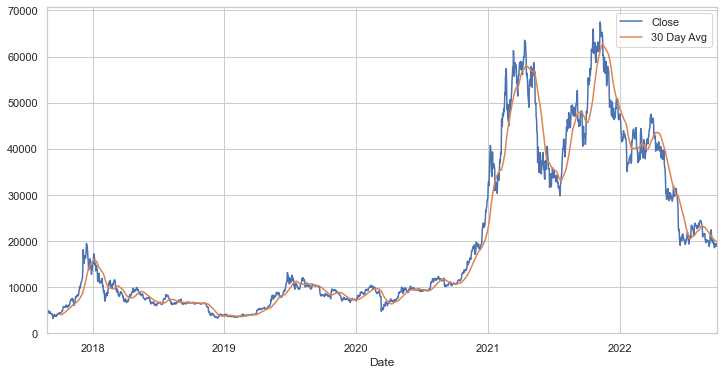

In [13]:
sns.set()
sns.set_style('whitegrid')
btc['Close'].plot(figsize=(12,6),label='Close')
btc['Close'].rolling(window=30).mean().plot(label='30 Day Avg')# Plotting the 
#rolling 30 day average against the Close Price
plt.legend()

In [14]:
btc['ohlc_average'] = (btc['Open'] + btc['High'] + btc['Low'] + btc['Close']) / 4

C:\Users\DELL\AppData\Local\Temp\ipykernel_2076\2563831694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc['ohlc_average'] = (btc['Open'] + btc['High'] + btc['Low'] + btc['Close']) / 4


In [15]:
btc.head()

,Open,High,Low,Close,ohlc_average
Date,,,,,
2017-08-29,4579.02,4626.52,4471.41,4568.66,4561.4025
2017-08-30,4565.30,4736.05,4549.40,4704.98,4638.9325
2017-08-31,4703.39,4886.73,4678.53,4879.76,4787.1025
2017-09-01,4892.01,4975.04,4469.24,4568.28,4726.1425
2017-09-02,4578.77,4714.08,4417.59,4581.11,4572.8875


In [16]:
btc['Price_After_Month']=btc['Close'].shift(-30) #This will be our label

In [17]:
btc.head()

,Open,High,Low,Close,ohlc_average,Price_After_Month
Date,,,,,,
2017-08-29,4579.02,4626.52,4471.41,4568.66,4561.4025,4128.299491
2017-08-30,4565.30,4736.05,4549.40,4704.98,4638.9325,4312.820213
2017-08-31,4703.39,4886.73,4678.53,4879.76,4787.1025,4361.139973
2017-09-01,4892.01,4975.04,4469.24,4568.28,4726.1425,4384.188461
2017-09-02,4578.77,4714.08,4417.59,4581.11,4572.8875,4311.980091


In [18]:
btc.tail()#We basically moved all our values 30 lines up in our last cell

,Open,High,Low,Close,ohlc_average,Price_After_Month
Date,,,,,,
2022-09-23,19290.279614,19294.627882,18831.329282,18931.734112,19086.992722,NaN
2022-09-24,18923.498800,19135.629500,18682.763486,18814.051600,18888.985846,NaN
2022-09-25,18802.699700,19277.511557,18700.551100,19238.753600,19004.878989,NaN
2022-09-26,19224.758300,20346.161400,18844.264402,19098.479820,19378.415981,NaN
2022-09-27,19109.881484,19731.875600,18528.601942,19399.488779,19192.461951,NaN


In [19]:
btc.dropna(inplace=True)
X=btc.drop('Price_After_Month',axis=1)
y=btc['Price_After_Month']

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## Model Selection

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(n_estimators=100,max_depth=1,learning_rate=0.1,random_state=0)
gbr.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=1, random_state=0)

In [23]:
accuracy=gbr.score(X_test,y_test)
accuracy

0.9112569824172054

In [24]:
pred2=gbr.predict(X_test)

In [25]:
print("The prediction is:",pred2[1],"But the real value is:" ,y_test[1])

The prediction is: 9097.017086993623 But the real value is: 7502.033156435


In [26]:
gbr.predict(sc.transform([[	19109.881484,19731.875600,18528.601942,19399.488779,19192.461951]]))

C:\Users\DELL\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([24315.19644027])